In [2]:
import time
import numpy as np
import pandas as pd
import shap
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

def status_encode(Xs):
    Xs_ = Xs.to_numpy().ravel()
    Xs_, Xs_uniques = pd.factorize(Xs_)
    Xs_ = Xs_.reshape(Xs.shape)
    Xs = pd.DataFrame(Xs_, columns=Xs.columns)
    return Xs

start_time = time.time()

df = pd.read_csv("GGS_new_renamed_features.csv", sep=',')

df["Religiosity"] = (df["Religiosity"] + 1).fillna(0).astype('int32')
df["Generation_bin"] = df["Generations"].map({1:1, 2:1, 3:1, 4:1, 5:2, 6:2})
df = df.fillna(0)


features = ["Gender","Generation_bin","Generations","Education","Locality","Mobility","Partnership",
            "Marriage","Childs","Religiosity"]

acc_f = []
acc_s = []
acc   = []

models = [#["SVM     ", svm.SVC(probability=False, gamma='auto')],
          ["XGBoost ", XGBClassifier(n_estimators=500, learning_rate=0.01, verbosity=0)]]
          #["CatBoost", CatBoostClassifier(iterations=700, learning_rate=0.01, verbose=False)]]

print (100*"=")
print (models[0][0], "Accuracy\tby Features \tby Statuses \tTotal \t\tStatuses Improv Total Improv")
print (100*"=")
    
for feature in features:
    
    y = df[feature]
    Xf = df[features].drop(columns=feature).copy()
    
    if feature == "Generation_bin":
        Xf = Xf.drop(columns="Generations") # "Generations_bin is derivative from "Generations"
    if feature == "Generations":
        Xf = Xf.drop(columns="Generation_bin")
    
    Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, y, test_size=0.2, random_state=42)

    
    Xs = df.drop(columns=["ID", "Gender", "Generation_bin", "Generations", "Education", "Locality",
                         "Mobility","Partnership", "Marriage","Childs","Religiosity", "Religion", 
                          "Church_visit", "sg", "sge","sgl", "generations2", "age"])
    
    Xs = status_encode(Xs)

    Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
    
    X = Xf.merge(Xs, left_index=True, right_index=True)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    
    for model in models:
        
        model[1].fit(Xf_train, yf_train)
        yf_pred = model[1].predict(Xf_test)
        acc_f.append(accuracy_score(yf_test, yf_pred))
        
        model[1].fit(Xs_train, ys_train)
        ys_pred = model[1].predict(Xs_test)
        acc_s.append(accuracy_score(ys_test, ys_pred))
        
        model[1].fit(X_train, y_train)
        y_pred = model[1].predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        
        print(feature.ljust(12), "\t\t%.3f" % acc_f[-1], "\t\t%.3f" % acc_s[-1], "\t\t%.3f" % acc[-1], 
              "\t\t%5.1f" % ((acc_s[-1]-acc_f[-1])*100/acc_f[-1]), "%", 
              "\t%5.1f" % ((acc[-1]-acc_f[-1])*100/acc_f[-1]), "%")
        print (100*"_")
        
print (100*"=")

for model in models:
    
    acc_f_mean = np.mean(acc_f)
    acc_s_mean = np.mean(acc_s)
    acc_mean   = np.mean(acc)
    
    print("\tAverage".ljust(12), "\t%.3f" % acc_f_mean, "\t\t%.3f" % acc_s_mean, "\t\t%.3f" % acc_mean, 
          "\t\t%5.1f" % ((acc_s_mean-acc_f_mean)*100/acc_f_mean), "%", 
          "\t%5.1f" % ((acc_mean-acc_f_mean)*100/acc_f_mean), "%")
    
print (100*"=")
print ("Time, s: ", "%.0f" % (time.time() - start_time))

XGBoost  Accuracy	by Features 	by Statuses 	Total 		Statuses Improv Total Improv
Gender       		0.681 		0.690 		0.714 		  1.3 % 	  4.8 %
____________________________________________________________________________________________________
Generation_bin 		0.770 		0.872 		0.871 		 13.2 % 	 13.1 %
____________________________________________________________________________________________________
Generations  		0.303 		0.390 		0.420 		 28.7 % 	 38.4 %
____________________________________________________________________________________________________
Education    		0.587 		0.703 		0.736 		 19.8 % 	 25.5 %
____________________________________________________________________________________________________
Locality     		0.551 		0.370 		0.549 		-32.8 % 	 -0.3 %
____________________________________________________________________________________________________
Mobility     		0.678 		0.635 		0.685 		 -6.4 % 	  0.9 %
____________________________________________________________________________


Men:	 1758
Women:	 3693
Total:	 5451
================================ SHAP ==================================

		Features impact on status prediction for Age=34


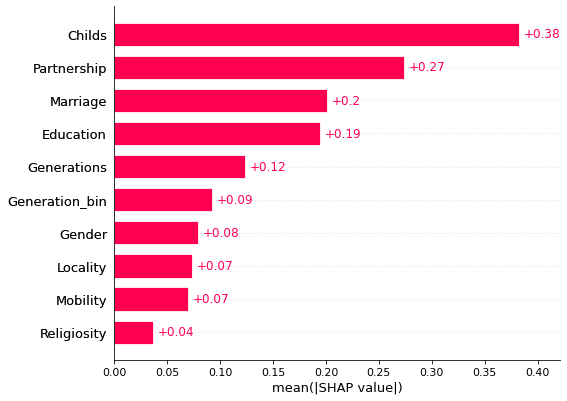

Features impact along the life course on status prediction


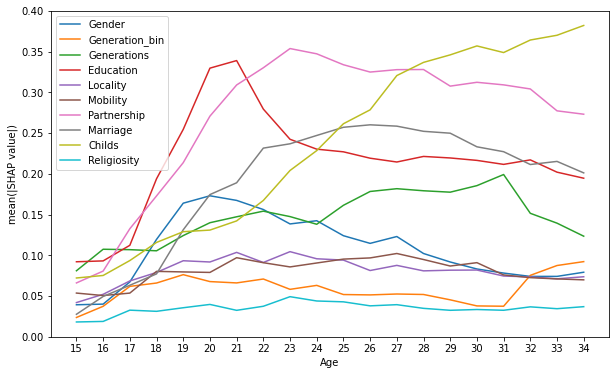

Impact of statuses along the life path on Gender prediction for men + women


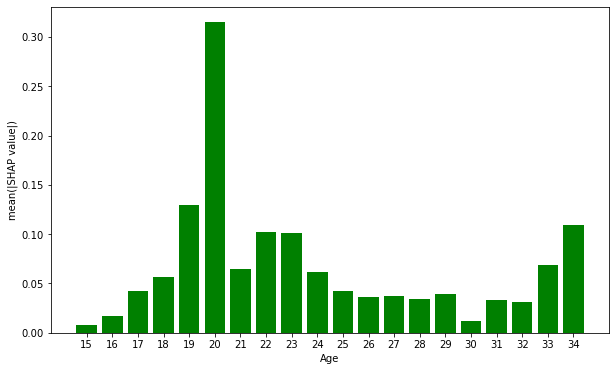

Impact of statuses along the life path on Generation_bin prediction for men + women


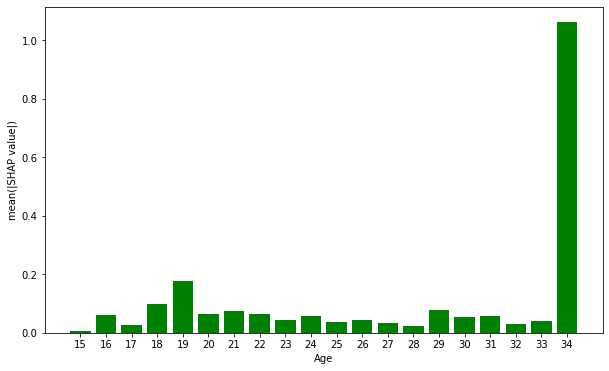

Impact of statuses along life path on Generation_bin prediction.


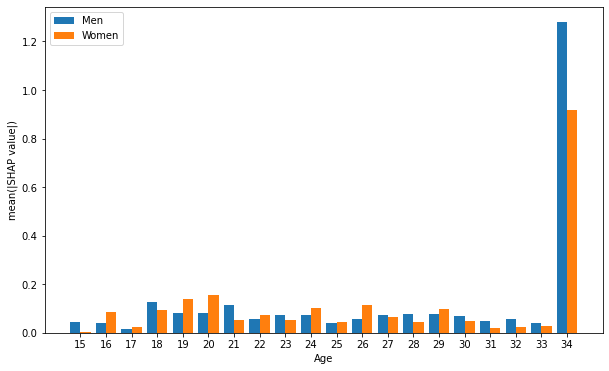

Impact of statuses along the life path on Generations prediction for men + women


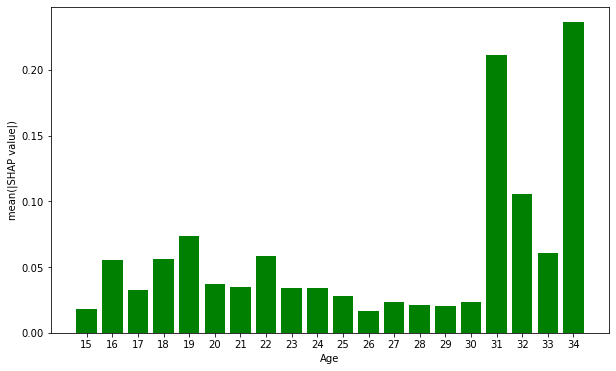

Impact of statuses along life path on Generations prediction.


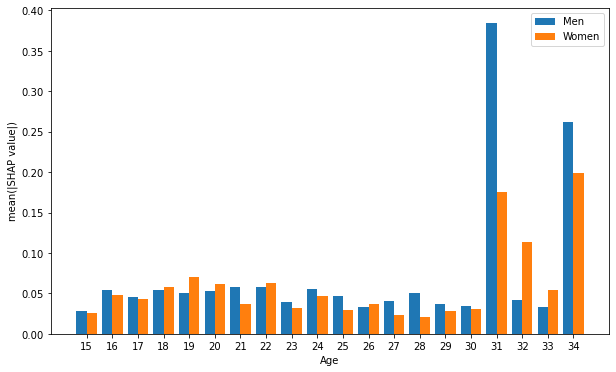

Impact of statuses along the life path on Education prediction for men + women


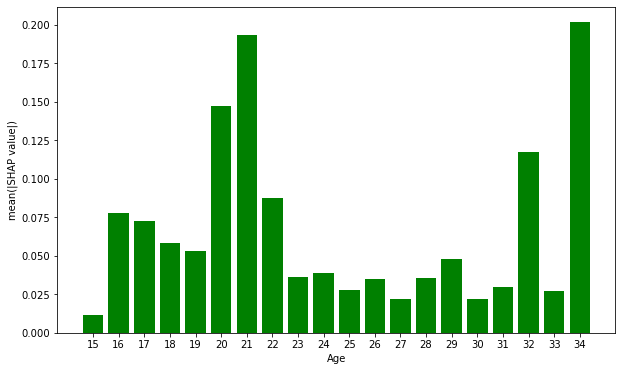

Impact of statuses along life path on Education prediction.


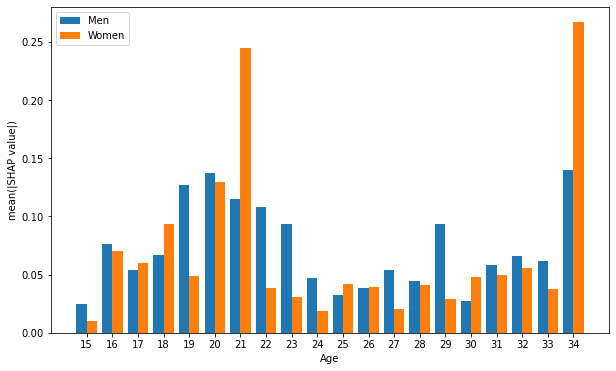

Impact of statuses along the life path on Locality prediction for men + women


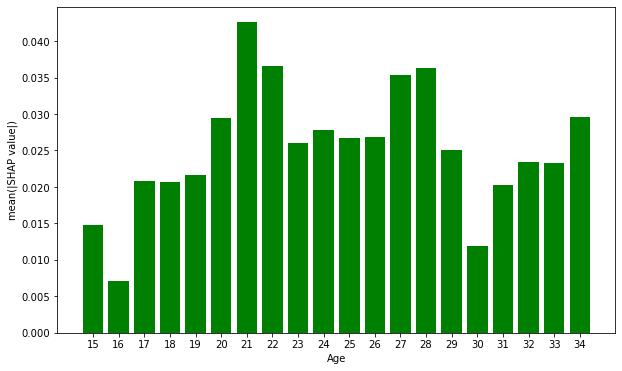

Impact of statuses along life path on Locality prediction.


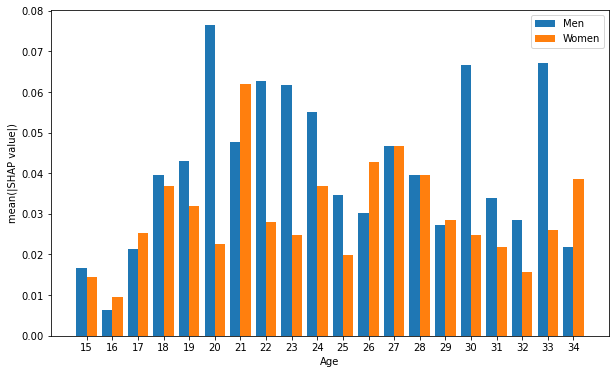

Impact of statuses along the life path on Mobility prediction for men + women


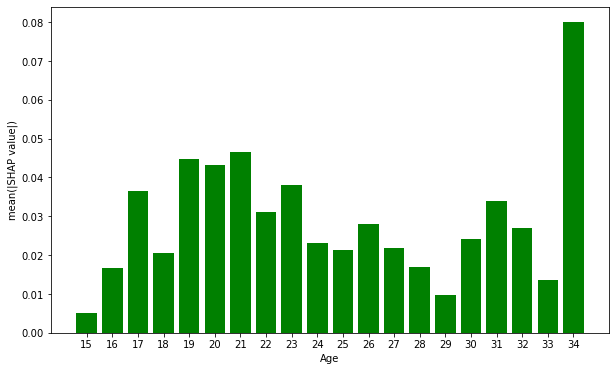

Impact of statuses along life path on Mobility prediction.


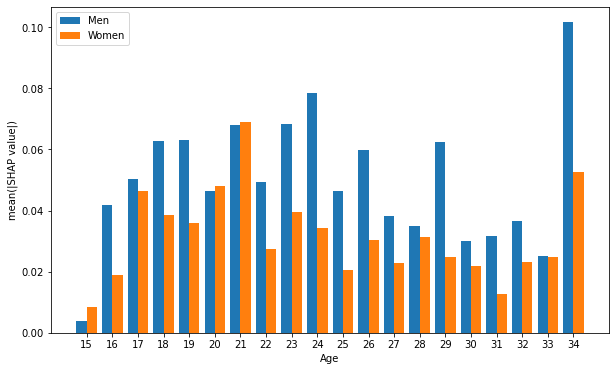

Impact of statuses along the life path on Partnership prediction for men + women


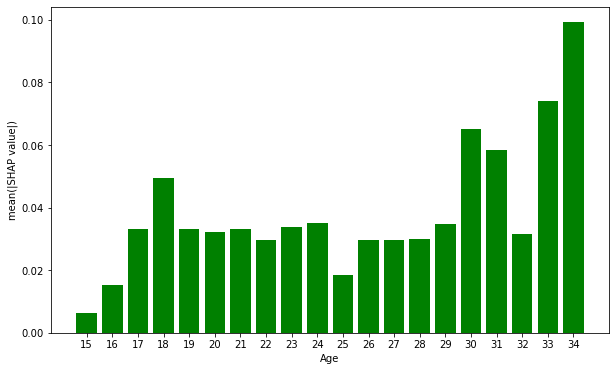

Impact of statuses along life path on Partnership prediction.


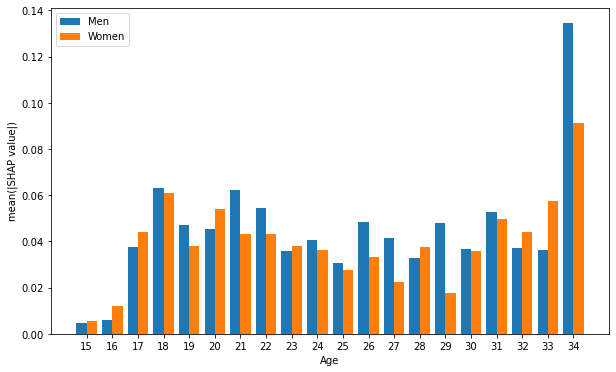

Impact of statuses along the life path on Marriage prediction for men + women


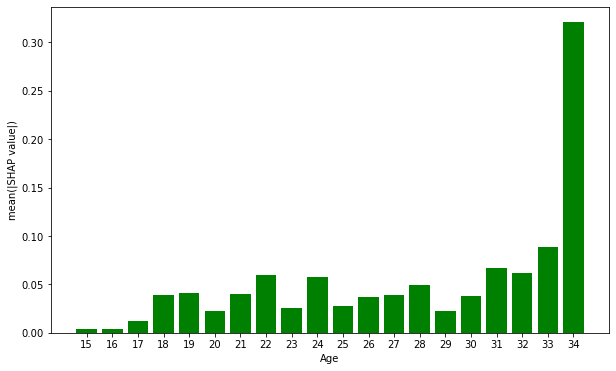

Impact of statuses along life path on Marriage prediction.


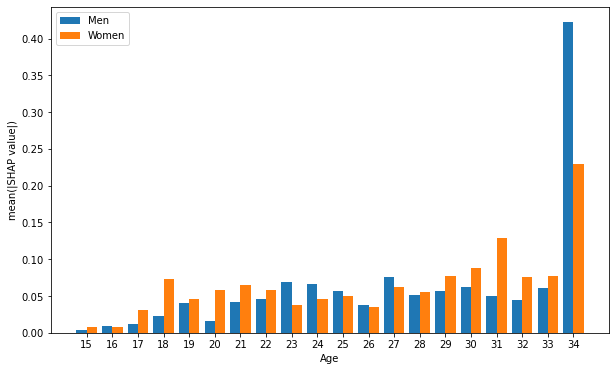

Impact of statuses along the life path on Childs prediction for men + women


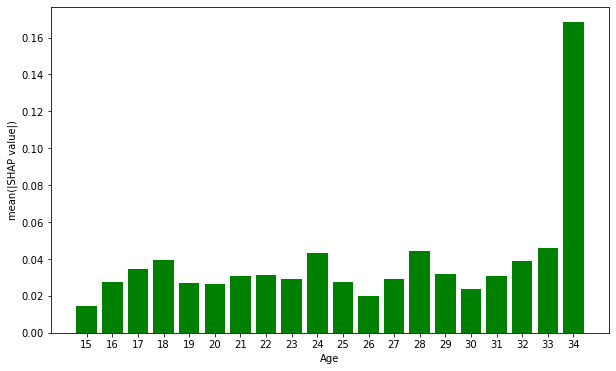

Impact of statuses along life path on Childs prediction.


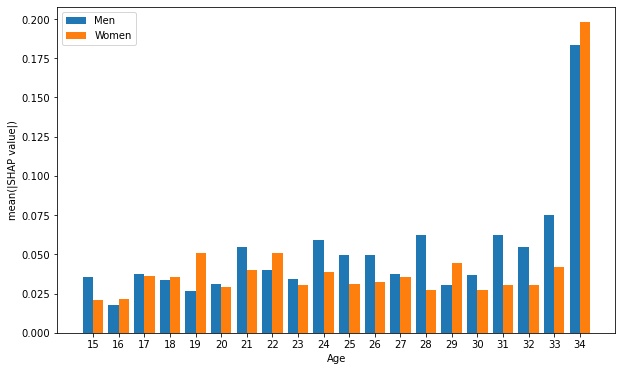

Impact of statuses along the life path on Religiosity prediction for men + women


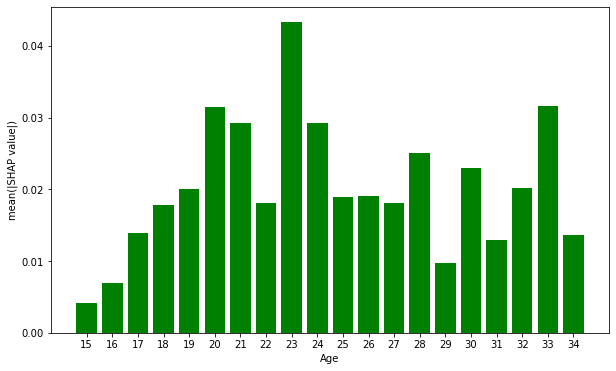

Impact of statuses along life path on Religiosity prediction.


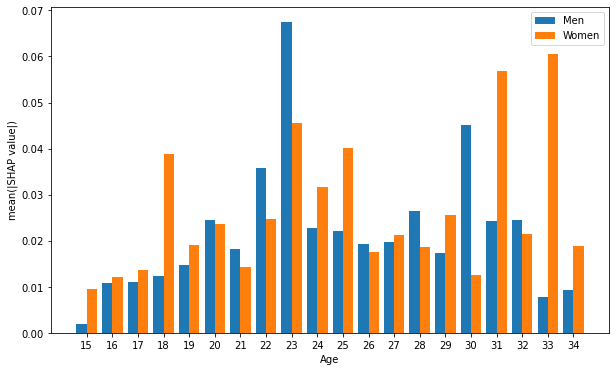

In [1]:
import time
import numpy as np
import pandas as pd
import shap
import copy
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

shap.initjs()

def status_encode(Xs):
    Xs_ = Xs.to_numpy().ravel()
    Xs_, Xs_uniques = pd.factorize(Xs_)
    Xs_ = Xs_.reshape(Xs.shape)
    Xs = pd.DataFrame(Xs_, columns=Xs.columns)
    return Xs


start_time = time.time()

df = pd.read_csv("GGS_new_renamed_features.csv", sep=',')

df[["Religiosity","Religion","Church_visit"]] = (df[["Religiosity","Religion","Church_visit"]]+1).fillna(0).astype('int32')
df["Generation_bin"] = df["Generations"].map({1:1, 2:1, 3:1, 4:1, 5:2, 6:2})
df = df.fillna(0)


features = ["Gender","Generation_bin","Generations","Education","Locality","Mobility","Partnership",
            "Marriage","Childs","Religiosity"]


models = [#["SVM     ", svm.SVC(probability=False, gamma='auto')],
          ["XGBoost ", XGBClassifier(n_estimators=500, learning_rate=0.01, verbosity=0)]]
          #["CatBoost", CatBoostClassifier(iterations=700, learning_rate=0.01, verbose=False)]]

years = []
for year in range(15, 35):
    years.append('a' + str(year) + '.6')

XS  = status_encode(df[years])

XSw = status_encode(df[df['Gender'] == 2][years])
XSm = status_encode(df[df['Gender'] == 1][years])

print("\nMen:\t", XSm.shape[0])
print("Women:\t", XSw.shape[0])
print("Total:\t", XS.shape[0])

print("================================ SHAP ==================================")


XF = df[features]

df_shap_f = pd.DataFrame(columns=features)

for y_status in XS.columns: 
    
    model_f = copy.deepcopy(models[0][1])    
    model_f.fit(XF, XS[y_status])
    explainer_f = shap.Explainer(model_f)
    shap_values_f = explainer_f(XF)
         
    for j in range(shap_values_f.shape[1]):            
        for i in range(shap_values_f.shape[0]):
            shap_values_f.values[i, j, 0] = np.mean(abs(shap_values_f.values[i, j, :]))
                
    shap.plots.bar(shap_values_f[:, :, 0], max_display=20, show=False)    
    ax_f = plt.gca()
    
    if y_status == "a34.6":
        print("\n\t\tFeatures impact on status prediction for Age=34")
        plt.show()
    else:
        plt.close()
        
    labels_f = [l.get_text() for l in ax_f.get_yticklabels()][:10]
    values_f = [rect.get_width() for rect in ax_f.patches][:10]
    
    df_shap_f_a = pd.DataFrame([values_f], columns=labels_f)    
    df_shap_f = df_shap_f.append(df_shap_f_a, ignore_index=True)
    

df_shap_f["Age"] = np.arange(15, 15 + df_shap_f.shape[0])

df_shap_f.plot(x="Age", xticks=range(15, 35, 1), ylabel="mean(|SHAP value|)", figsize=(10, 6)) 
              #title="Features impact along the life course on status prediction")
print("Features impact along the life course on status prediction")
plt.show()


for feature in features:
    
    y = df[feature]

    ##XS = status_encode(XS)
    XS_train, XS_test, yS_train, yS_test = train_test_split(XS, y, test_size=0.2, random_state=42)
    
    yw = df[df['Gender'] == 2][feature]      # for women   
    ##XSw = status_encode(XSw)
    
    ym = df[df['Gender'] == 1][feature]      # for men
    ##XSm = status_encode(XSm)

    
    for model in models:
        
        model_w = copy.deepcopy(model[1])
        model_m = copy.deepcopy(model[1])
        model_s = copy.deepcopy(model[1])
        
        model[1].fit(XS, y)
        model_w.fit(XSw, yw)
        model_m.fit(XSm, ym)
        
        explainer = shap.Explainer(model[1])
        shap_values = explainer(XS)
        
        explainer_w = shap.Explainer(model_w)
        shap_values_w = explainer_w(XSw)
        
        explainer_m = shap.Explainer(model_m)
        shap_values_m = explainer_m(XSm)

        
        if len(shap_values.shape) <= 2:
            shap.plots.bar(shap_values, max_display=20, show=False)
            ax = plt.gca()
            plt.close()
            if feature != "Gender":
                shap.plots.bar(shap_values_w, max_display=20, show=False)
                ax_w = plt.gca()
                plt.close()
                shap.plots.bar(shap_values_m, max_display=20, show=False)
                ax_m = plt.gca()
                plt.close()
            
        else:   # for multiclass ( > 2 ) feature
            for j in range(shap_values.shape[1]):
                for i in range(shap_values.shape[0]):
                    shap_values.values[i, j, 0] = np.mean(abs(shap_values.values[i, j, :]))
                    
                for i in range(shap_values_w.shape[0]):
                    shap_values_w.values[i, j, 0] = np.mean(abs(shap_values_w.values[i, j, :]))
                    
                for i in range(shap_values_m.shape[0]):
                    shap_values_m.values[i, j, 0] = np.mean(abs(shap_values_m.values[i, j, :]))
                
            shap.plots.bar(shap_values[:, :, 0], max_display=20, show=False)
            ax = plt.gca()
            plt.close()
            shap.plots.bar(shap_values_w[:, :, 0], max_display=20, show=False)
            ax_w = plt.gca()
            plt.close()
            shap.plots.bar(shap_values_m[:, :, 0], max_display=20, show=False)
            ax_m = plt.gca()
            plt.close()
        
        
        labels = [l.get_text()[1:3] for l in ax.get_yticklabels()][:20]
        values = [rect.get_width() for rect in ax.patches][:20] 
        df_shap = pd.DataFrame({'Labels': labels, 'Values': values})
        df_shap.sort_values(by=['Labels'], ascending=True, inplace=True)


        fig, ay = plt.subplots()
        ay.set_ylabel('mean(|SHAP value|)')
        ay.set_xlabel('Age')
        ay.bar(df_shap['Labels'], df_shap['Values'], color='green')        
        fig.set_size_inches(10, 6)
        
        print('Impact of statuses along the life path on', feature, 'prediction for men + women')
        plt.show()
        
        
        if feature != "Gender":
            
            labels_w = [l.get_text()[1:3] for l in ax_w.get_yticklabels()][:20]
            values_w = [rect.get_width() for rect in ax_w.patches][:20]
            df_shap_w = pd.DataFrame({'Labels': labels_w, 'Values': values_w})
            df_shap_w.sort_values(by=['Labels'], ascending=True, inplace=True)


            labels_m = [l.get_text()[1:3] for l in ax_m.get_yticklabels()][:20]
            values_m = [rect.get_width() for rect in ax_m.patches][:20]
            df_shap_m = pd.DataFrame({'Labels': labels_m, 'Values': values_m})
            df_shap_m.sort_values(by=['Labels'], ascending=True, inplace=True)
            
            plt.show()
            
            x = np.arange(15, 35)  # the label locations
            width = 0.40           # the width of the bars
            
            fig, ay = plt.subplots()
            rects_m = ay.bar(x - width/2, df_shap_m['Values'], width, label='Men')
            rects_w = ay.bar(x + width/2, df_shap_w['Values'], width, label='Women')
            
            ay.set_ylabel('mean(|SHAP value|)')
            ay.set_xlabel('Age')
            ay.set_xticks(range(15, 35, 1))
            ay.legend()
            fig.set_size_inches(10, 6)
            
            print("Impact of statuses along life path on", feature, "prediction.")
            plt.show()